In [74]:
import numpy as np
import sympy as sym
from tqdm import tqdm

SyntaxError: invalid syntax (1749041247.py, line 4)

In [72]:
#Optimización-Punto 2


x= sym.symbols("x")
y= sym.symbols("y")
z= sym.symbols("z")

def f(x,y,z):
    f= x**2 + y**2 + z**2 - (2*z) +1
    return f

def g(x,y,z):
    g= (2*x) - (4*y) + (5*z) - 2
    return g

Dxf = lambda f,x,y,z,h=1e-5: (f(x+h,y,z) - f(x-h,y,z))/(2*h)
Dyf = lambda f,x,y,z,h=1e-5: (f(x,y+h,z) - f(x,y-h,z))/(2*h)
Dzf = lambda f,x,y,z,h=1e-5: (f(x,y,z+h) - f(x,y,z-h))/(2*h)

Dxg = lambda g,x,y,z,h=1e-5: (g(x+h, y, z) - g(x-h,y,z))/(2*h)
Dyg = lambda g,x,y,z,h=1e-5: (g(x,y+h,z) - g(x,y-h,z))/(2*h)
Dzg = lambda g,x,y,z,h=1e-5: (g(x,y,z+h) - g(x,y,z-h))/(2*h)

x0, y0, z0= 0.5, 0.1, 0.2

d_f = lambda f,x,y,z: np.array([Dxf(f,x,y,z),Dyf(f,x,y,z), Dzf(f,x,y,z)])
d_f= d_f(f,x0,y0,z0)

d_g = lambda g,x,y,z: np.array([Dxg(f,x,y,z),Dyg(f,x,y,z), Dzg(f,x,y,z)])
d_g= d_g(g,x0,y0,z0)


def Minimizer(f, g, N = 1000, gamma = 0.01):
    x0, y0, z0= 0.5, 0.1, 0.1
    for i in tqdm(range(1,N)):

        norma= np.linalg.norm(d_g)**2
        g_n= g(x0,y0,z0)

        #mult. Lagrange
        x0-=gamma* ((d_f[0]-d_g[0]*g_n)/norma)
        y0-=gamma* ((d_f[1]-d_g[1]*g_n)/norma)
        z0-=gamma* ((d_f[2]-d_g[2]*g_n)/norma)
        
        
    return f(x0,y0,z0)

r= Minimizer(f,g)
print("El mínimo de f(x,y,z) es " + str(r))

100%|██████████| 999/999 [00:00<00:00, 21226.92it/s]

El mínimo de f(x,y,z) es 0.25576124851496485


In [73]:
#Optimización-Punto 3

import scipy.optimize as spo
import numpy as np
import sympy as sym


def volumen(p):
    return -p[0] * p[1] * p[2]


#constraints 
area = ( {'type':'eq','fun': lambda p: p[0]*p[1] + 2*p[1]*p[2] + 2*p[0]*p[2] -12 } )

p0 = [1,2, 3]
result = spo.minimize( volumen, p0, constraints=area )
result


ModuleNotFoundError: No module named 'scipy'

1.0
0.9972602739726028
0.9917958341152187
0.9836440875334498
0.9728644263002065
0.9595375163508886
0.9437642969040246
0.925664707648331
0.9053761661108333
0.8830518222889223
0.8588586216782669
0.8329752111619355
0.8055897247675705
0.7768974879950269
0.7470986802363135
0.7163959947471499
0.6849923347034391
0.6530885821282104
0.620881473968463
0.5885616164194197
0.556311664834794
0.5243046923374497
0.4927027656760144
0.46165574208547105
0.431300296030536
0.4017591798640609
0.37314071773675794
0.3455385276576005
0.3190314625222229
0.2936837572807312
0.26954536627135606
0.24665247214967925
0.22502814582422792
0.20468313537984567
0.18561676112528472
0.16781789362012042
0.15126599178361538
0.13593217891787904
0.12178033563327793
0.10876819018205097
0.09684838851826456
0.08596952843813074
0.07607714434388009
0.06711463144857367
0.05902410053422507
0.05174715663274526
0.04522559716670065
0.039402027120577554
0.03422039067732352
0.029626420422011596
0.02556800666557165
0.021995490665724652
0.01

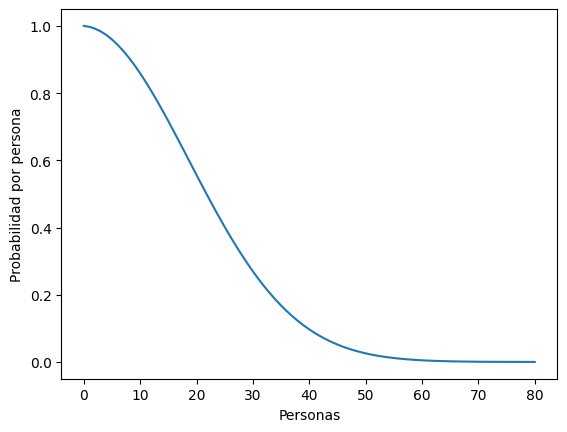

In [67]:
#Probabilidad-Punto 4
import numpy as np
import matplotlib.pyplot as plt

N= 365
personas= np.array(list(range(81)))
prob_persona= np.zeros(81)
x= 1

for i in range(len(personas)):
    x*= (N-i)/N
    prob_persona[i]= x
    print(prob_persona[i])

plt.plot(personas, prob_persona)
plt.xlabel("Personas")
plt.ylabel("Probabilidad por persona")
plt.show()




In [156]:
#Probabilidad-Punto 8
N = int(1e5)
def GetSample(N= int(1e5), ncoins = 4, Weights=None):
    
    Sample = np.zeros((N,ncoins))
    
    Events = [-1,1]
    
    for i in range(N):
        
        if Weights == None:
            Exp = np.random.choice(Events,ncoins)
            
       # print(Exp)
        Sample[i] = Exp
        
    return Sample
#print(Sample)

Sample = GetSample()
NCaras = 0
for i in range(Sample.shape[0]):
    if np.sum(Sample[i]) == 0:
        NCaras+= 1

Prob= NCaras/N

print("la probabilidad de obtener dos caras y dos sellos si se lanzan 4 monedas simultáneamente es de " + str(Prob))


la probabilidad de obtener dos caras y dos sellos si se lanzan 4 monedas simultáneamente es de 0.37511


In [ ]:
#Distribuciones continuas de probabilidad
import numpy as np 
import sympy as sym 


x=sym.symbols("x")
y=sym.symbols("y")


f=(2/3)*(x+2*y)


#Para verificar que la funcion sea una distribución continua 
integral= sym.integrate (sym.integrate(f,(x, 0,1)),(y, 0,1))
if  integral ==1: 
    print("la funcion es de distribucion continua")
    
    
#Para hallar las fucones marginañes 

g= sym.integrate (f,(y, 0, 1))
h= sym.integrate (f,(x, 0, 1))
print ("g(x) es "+ str(g), "h(y) es" + str(h))

#Para Hallar E(x) y E(Y)

Ex= sym.integrate (sym.integrate(x*f,(x, 0,1)),(y, 0,1))
Ey= sym.integrate (sym.integrate(y*f,(x, 0,1)),(y, 0,1))

print (" E(x) = " + str(Ex), " E(y) = " + str(Ey) )
# Para las covarianzas 
Exy=sym.integrate (sym.integrate(x*y*f,(x, 0,1)),(y, 0,1))
covarianza1= Exy-(Ex*Ey)
cov2=(x-Ex)*(y-Ey)
covarianza2=Exy=sym.integrate (sym.integrate(cov2*f,(x, 0,1)),(y, 0,1))
print("las covarianzas son " + str(covarianza1)+" y" + str(covarianza2))


In [ ]:

#punto cuadrados 1b
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,8,10)

y = np.zeros((3,len(x)))

y[0] = 2*x-2
y[1] = -0.5*x + 0.5
y[2] = 4 - x
A = np.array([[2,-1],[1,2],[1,1]])
b = np.array([2,1,4])
At = A.T


M = np.dot(At,A)

bt = np.dot(At,b)

rangox = np.linspace(-5, 5, 100)
rangoy = np.linspace(-5, 5, 100)

distancia_minima = float('inf')
optimal_position = None

for i in rangox:
    for j in rangoy:
        distancia_actual = np.linalg.norm(np.dot(A, [i, j]) - b)
        if distancia_actual < distancia_minima:
            distancia_minima = distancia_actual
            optimal_position = (i, j)
            
print("Posición óptima:", optimal_position)
print("Distancia mínima:", distancia_minima)


for l in range(y.shape[0]):
    plt.plot(x,y[l],ls='--',lw=2)
plt.scatter(xsol[0],xsol[1],color='r')

In [ ]:
#punto cudrados 7  
import numpy as np 

#A
A=np.array([[3,1,-1],[1,2,0],[0,1,2],[1,1,-1]])
b=np.array([-3,-3,8,9])
At=np.transpose(A)
AAt=np.dot(At,A)
ATb=np.dot(At,b)
x=np.dot(np.linalg.inv(AAt),ATb)
pwb=np.dot(A,x)
print(pwb)
#B
def grahm_schmidt(A):
    m, n = A.shape
    Q = np.zeros((m, n))  
    R = np.zeros((n, n))  

    for j in range(n):
        v = A[:, j]  
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])  
            v = v - R[i, j] * Q[:, i]  

        R[j, j] = np.linalg.norm(v)  
        Q[:, j] = v / R[j, j] 
    return Q, R

base=grahm_schmidt(A)
print(base)

In [ ]:
#Markov

import matplotlib.pyplot as plt
from itertools import permutations
import numpy as np
from itertools import combinations_with_replacement

Pj= np.array([[0.5, 0.5]]) # cara sello
Ps= np.array([[0.9, 0.1]])

T = np.array([[0.8, 0.2],
              [0.2,0.8]])
E = np.array([[0.5, 0.9],
              [0.5,0.1]])

States= np.array([0,1]) #0 S, 1 C

DictH = {0:'Sello',1:'Cara'} 

apri=np.array([0.2, 0.8]) #para ps y pj

Obs= np.array([0,1,1,1,0,1,0,1])
#(S,C,C,C,S,C,S,C)


def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    print(CStates)
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)


HiddenStates = GetStates(States,8)


def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p
P = np.zeros(HiddenStates.shape[0], dtype=np.float64)
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],apri)
    
print(P)
plt.plot(P)

i = np.where( P == np.amax(P))
print(f"El estado oculto más probable es: {HiddenStates[ii]}, es decir:")
lista = []
for i in HiddenStates[ii][0]:
    lista.append(DictH[i])
print(lista)
print(f"Y su probabilidad es de : {max(P)}")

np.sum(P)